#### What is SKLearn??
Its a python machine learning tool. They can be used to make machine learning models and make predictions out of our data


#### Why Scikit-Learn?
* built on NumPy and Matplotlib
* has many build in machine learning models
* methods to eveluate your machine learning models
* very well designed API


#### ScikitLearn workflow
1. Get the data ready
2. Pick a model
3. Fit the model with to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload the trained model

#### What all are we going to learn?
0. An end to end scikit-learn flow
1. Getting data ready 
2. Choose the right estimator/algorithm for out problem
3. Fitting a model to the data and making predictions
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!!




In [38]:
what_were_covering = [
                       "0. An end to end scikit-learn flow",
                        "1. Getting data ready" ,
                        "2. Choose the right estimator/algorithm for out problem",
                        "3. Fitting a model to the data and making predictions",
                        "4. Evaluating a model",
                        "5. Improve a model",
                        "6. Save and load a trained model",
                        "7. Putting it all together!!"]

## 0. An end-to-end Scikit-Learn workflow

In [3]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("./Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1) # axis is 1 to not get an extra column for indexing

#Create y(labels)
Y = heart_disease["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
# 2. Choose the right model and hyper parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default hyperparameters
clf.get_params() #default parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
clf.fit(X_train,Y_train) #trains the data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [20]:
# 4. Evalutae the model on the training data and test data
clf.score(X_train,Y_train)

1.0

In [21]:
clf.score(X_test,Y_test)

0.8032786885245902

### evaluating models

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [23]:
confusion_matrix(Y_test, y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [29]:
accuracy_score(Y_test, y_preds)

0.8032786885245902

In [30]:
# 5. Improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,110,10):
    print(f"Trying models with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accracy on test set: {clf.score(X_test,Y_test) * 100:.2f}%")

Trying models with 10 estimators...
Model accracy on test set: 68.85%
Trying models with 20 estimators...
Model accracy on test set: 77.05%
Trying models with 30 estimators...
Model accracy on test set: 73.77%
Trying models with 40 estimators...
Model accracy on test set: 77.05%
Trying models with 50 estimators...
Model accracy on test set: 77.05%
Trying models with 60 estimators...
Model accracy on test set: 78.69%
Trying models with 70 estimators...
Model accracy on test set: 78.69%
Trying models with 80 estimators...
Model accracy on test set: 77.05%
Trying models with 90 estimators...
Model accracy on test set: 77.05%
Trying models with 100 estimators...
Model accracy on test set: 75.41%


In [31]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [33]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)
#will give the result of the last n estimator

0.7540983606557377

### errors
study managing packages
or just google

# <u>Here starts Everything<u>

In [39]:
what_were_covering

['0. An end to end scikit-learn flow',
 '1. Getting data ready',
 '2. Choose the right estimator/algorithm for out problem',
 '3. Fitting a model to the data and making predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!!']

In [41]:
#  Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels(usually 'X' & 'Y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values(also called feature coding)

In [42]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [55]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 


In [58]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Quick tip
Before working on any data we should
* clean data (for missing data. so remove or have some avg values)
* transform data (convert it to numbers. Eg assigning 0 to green, 1 to red etc etc.)
* reduce data (more data means more energy. so if we get same result with less data, then we can save resources)

### 1.1 Make sure its all numerical

In [64]:
car_sales = pd.read_csv("./Data/car-sales-extended.csv")
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [65]:
len(car_sales)

1000

In [66]:
# Split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)


In [68]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

### error: we canyt use the string Toyota as something from which machine can learn. It has to be numbers

In [73]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [74]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


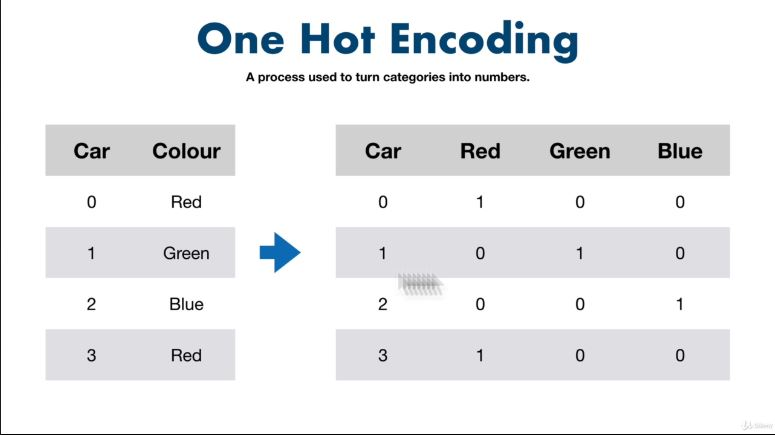

In [83]:
# what is one hot encoding??
from IPython.display import Image
Image(".\img\Capture.JPG")

In [86]:
#Another way of doing the same thing
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [90]:
# Lets refit the model
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train);

In [91]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values??

1. Fill them some value (also known as imputation).
2. Remove the samples with missing data altogether

In [97]:
# Import car sales missing data
car_sales_missing = pd.read_csv("./Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [98]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [99]:
#Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [100]:
# Lets try and convert them to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

#### this caused error because the input has some null values!!

#### Option 1: Fill missing data with pandas

In [101]:
car_sales_missing["Doors"].mean()

4.011578947368421

In [104]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" columns
car_sales_missing["Doors"].fillna(4,inplace=True)





In [105]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [106]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [107]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [108]:
len(car_sales_missing)

950

#### we lost 50 data to remove the unfilled data. Thats our sacrifice which we had to make

In [109]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [111]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [112]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [113]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [115]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [116]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [120]:
# Fill missing values with scikitlearn
from  sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer(something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),   #first one is just a name given to this imputer so that we can access it later if required
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [125]:
car_sales_filled = pd.DataFrame(filled_X,
                              columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [126]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [127]:
# Lets try and convert them to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [129]:
# Now we've got our data as numbers and filled (no missing data)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.17652060927174562

In [130]:
# this performs worse than the initial model becuase we have lessd data
len(car_sales_filled),len(car_sales)

(950, 1000)

#### <u> -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-End of lecture 14 -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-<u>